# RATINGS PREDICTION PROJECT :

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

# Data Collection Phase 
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.
Basically, we need these columns1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project. It 
completely depends on your imagination or assumption.

# Hint:
• Try to fetch data from different websites. If data is from different websites, it will help our 
model to remove the effect of over fitting.
• Try to fetch an equal number of reviews for each rating, for example if you are fetching
10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
• Convert all the ratings to their round number, as there are only 5 options for rating i.e., 
1,2,3,4,5. If a rating is 4.5 convert it 5.

# Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

In [11]:
# pip install pipreqs
import pipes


# pipes freeze > requirements.txt

SyntaxError: invalid syntax (3750906371.py, line 5)

In [3]:
from multiprocessing.spawn import import_main_path
from os import path



In [4]:
# pip install sklearn seaborn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 285.1/285.1 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 17.4 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ------------------------------------- 957.2/957.2 kB 29.6 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 11.5 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 19.8 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e714a6b6c30fd8acb9ad32cdb7794fb3890c217d65dea96397e695bca5fec90e
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1

In [149]:
#Import Necessary  Libraries 
import pandas as pd
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

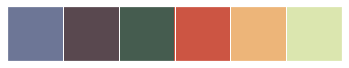

In [150]:
# Color Palettes
colors = ["#6D7696", "#59484F", "#455C4F", "#CC5543", "#EDB579", "#DBE6AF"]
sns.palplot(sns.color_palette(colors))

In [151]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

In [152]:
#load the dataset
df=pd.read_excel('ratings20000.xlsx')
df.shape

(23368, 3)

In [153]:
df #dataset

,Unnamed: 0,Review,Rating
0,0,Night mode is simply amazing and give you a cl...,5
1,1,The Product is fantastic with great nay awesom...,5
2,2,Switched from Android to iPhone and this trans...,5
3,3,I bought this iphone 12 in big billion days an...,4
4,4,Green colour is charming and pricelessNo weigh...,5
...,...,...,...
23363,23363,Good Product Happy,5
23364,23364,Good,5
23365,23365,It's good design 👍 Valueable product & money 🤑💰,5
23366,23366,Sooo good product watch 3 series is sooo beaut...,5


# DataSet Attributions:

Review:Review columns shows all the different product reviews over the product.

Rating : this feature columns are rating out of 5 , 5 is the highest and 1 is the lowest.

# 1.Data Cleaning

In [154]:
# Remove the Unnamed: 0  from data set, as they are not unique for each row and hence not useful for the model
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(23368, 2)

# 2. Exploratory Data Analysis

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  23368 non-null  object
 1   Rating  23368 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 365.2+ KB


In [156]:
df.shape

(23368, 2)

In [157]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [158]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [159]:
df.Rating.value_counts()

5    15096
4     4237
1     2004
3     1543
2      488
Name: Rating, dtype: int64

In [160]:
df.Review.value_counts()

Good                                                                                                                                                                          671
Nice                                                                                                                                                                          328
Good product                                                                                                                                                                  240
nice camara under 23000 Takar modda                                                                                                                                           197
Awesome... Awesome... I got it with price of 15k+ during Big billion day sale. I feel it was very cheap price for such a classy products... love you my first camera Canon    197
                                                                                                              

In [161]:
#dataset shape and info
print('df shape is ',df.shape)

print('df info',df.info)

df shape is  (23368, 2)
df info <bound method DataFrame.info of                                                   Review  Rating
0      Night mode is simply amazing and give you a cl...       5
1      The Product is fantastic with great nay awesom...       5
2      Switched from Android to iPhone and this trans...       5
3      I bought this iphone 12 in big billion days an...       4
4      Green colour is charming and pricelessNo weigh...       5
...                                                  ...     ...
23363                                 Good Product Happy       5
23364                                               Good       5
23365    It's good design 👍 Valueable product & money 🤑💰       5
23366  Sooo good product watch 3 series is sooo beaut...       5
23367                                      More valuable       4

[23368 rows x 2 columns]>


# Missing Values

In [162]:
#find out the null values in the dataset
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<AxesSubplot:>

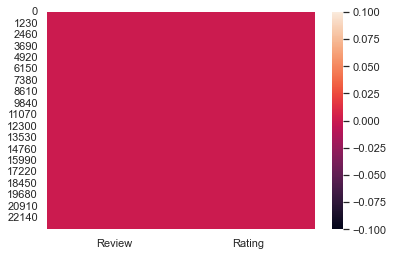

In [163]:
#plot the null-values using seaborn library 
import seaborn as sns
sns.heatmap(df.isnull())

# Univeriate Analysis
Ploting of distribution plots of feature columns :

5    15096
4     4237
1     2004
3     1543
2      488
Name: Rating, dtype: int64

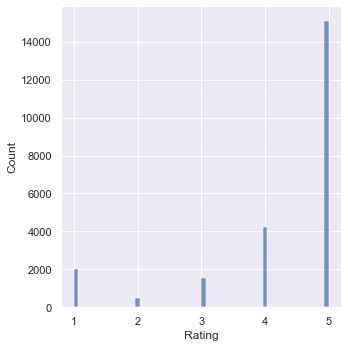

In [164]:
sns.displot(df['Rating'])
df.Rating.value_counts()

Rating


5    15096
4     4237
1     2004
3     1543
2      488
Name: Rating, dtype: int64


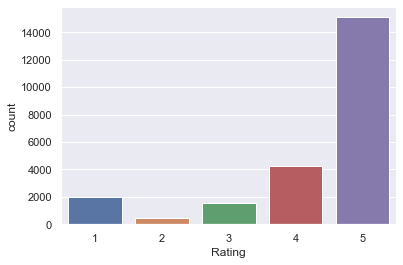

In [165]:
col=['Rating']
for i in col:
    print(i)
    print("\n")
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [5]:
# pip install nltk

     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ------------------------------------- 263.1/263.1 kB 15.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [166]:
import nltk
#nltk.download('stopwords')

In [167]:
#importing WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [168]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,Night mode is simply amazing and give you a cl...,5,92
1,The Product is fantastic with great nay awesom...,5,210
2,Switched from Android to iPhone and this trans...,5,503
3,I bought this iphone 12 in big billion days an...,4,473
4,Green colour is charming and pricelessNo weigh...,5,359


In [169]:
# Convert all messages to lower case
df['Review'] = df['Review'].str.lower()

# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Review'] = df['Review'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [170]:
df['clean_length'] = df.Review.str.len()
df.head()

,Review,Rating,Length,clean_length
0,night mode simply amazing give clear crisp ima...,5,92,59
1,product fantastic great nay awesome camera.bat...,5,210,166
2,switched android iphone transition really smoo...,5,503,392
3,bought iphone numbr big billion day saved alot...,4,473,332
4,green colour charming pricelessno weight iphon...,5,359,338


In [171]:
# Total length removal
print ('Origian Length', df.Length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 1666911
Clean Length 1270269


Wordcloud does not support python 3.7 or higher till date.

In [6]:
# pip install xgboost

     -------------------------------------- 125.4/125.4 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [172]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [173]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
x = tf_vec.fit_transform(df['Review'])

In [174]:
x

<23368x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 153408 stored elements in Compressed Sparse Row format>

In [175]:
y=df['Rating']

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [177]:
y_train.shape,y_test.shape

((16357,), (7011,))

In [178]:
x_train.shape,x_test.shape

((16357, 10000), (7011, 10000))

# First we try to build a regression model on this 5 classes.
# LogisticRegression

In [47]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)*100))
y_pred_lg = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_lg)*100))

Training accuracy is 76.81726477960507
Test accuracy is 72.842675795179


In [48]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_lg))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_lg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_lg)))

Error:
Mean Absolute Error: 0.4676936243046641
Mean Squared Error: 1.1215233204963628
Root Mean Square Error: 1.0590199811601115


In [49]:
print(confusion_matrix(y_test,y_pred_lg))
print(classification_report(y_test,y_pred_lg))
print(accuracy_score(y_test,y_pred_lg))

[[ 327    0    7   17  221]
 [  65    1    8   14   74]
 [  52    0  132   44  246]
 [  46    0    7  220  985]
 [  39    0    2   77 4427]]
              precision    recall  f1-score   support

           1       0.62      0.57      0.59       572
           2       1.00      0.01      0.01       162
           3       0.85      0.28      0.42       474
           4       0.59      0.17      0.27      1258
           5       0.74      0.97      0.84      4545

    accuracy                           0.73      7011
   macro avg       0.76      0.40      0.43      7011
weighted avg       0.72      0.73      0.67      7011

0.72842675795179


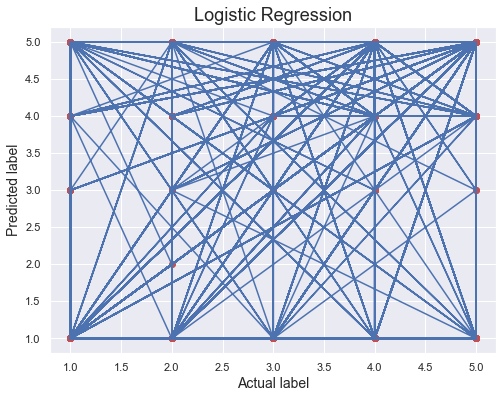

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_lg, color='r')
plt.plot(y_test,y_pred_lg, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# obsdervation

1. As we observe that no concluded results are there.
lets build a classification model either


# Since the column has binary variable we will use logistic classification model,and for that we convert the 5 classes into 2 major classes 1and 0,
# greater than 3 are good reviews and less then 3 are bad reviews


In [52]:
# Create Classification version of target variable
df['goodproduct'] = [1 if x >= 3 else 0 for x in df['Rating']]
# Separate feature variables and target variable
X = df.drop(['Rating','goodproduct'], axis = 1)
y = df['goodproduct']

In [53]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23363    1
23364    1
23365    1
23366    1
23367    1
Name: goodproduct, Length: 23368, dtype: int64

In [54]:
y.value_counts()

1    20876
0     2492
Name: goodproduct, dtype: int64

# Regressor Model Building:

# Logistic Regression:

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [7]:
# pip install imblearn

     -------------------------------------- 199.3/199.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [58]:
np.bincount(y)

array([ 2492, 20876], dtype=int64)

In [59]:
y_train.value_counts()

1    20876
0    20876
Name: goodproduct, dtype: int64

In [61]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test,pred_test)*100)

At random state 99  The model performs very well
At random_state:- 99
Training accuracy_score is:- 93.53268428372739
Testing accuracy_score is:- 93.47454000855798
At random state 117  The model performs very well
At random_state:- 117
Training accuracy_score is:- 93.58082807317855
Testing accuracy_score is:- 93.64569961489089
At random state 268  The model performs very well
At random_state:- 268
Training accuracy_score is:- 93.60757462287364
Testing accuracy_score is:- 93.64569961489089
At random state 271  The model performs very well
At random_state:- 271
Training accuracy_score is:- 93.58617738311757
Testing accuracy_score is:- 93.62430466409927
At random state 274  The model performs very well
At random_state:- 274
Training accuracy_score is:- 93.67176634214186
Testing accuracy_score is:- 93.68848951647412
At random state 498  The model performs very well
At random_state:- 498
Training accuracy_score is:- 93.58082807317855
Testing accuracy_score is:- 93.58151476251605


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=274,test_size=0.20)

In [63]:
x_train.shape

(18694, 10000)

In [64]:
y_train.shape

(18694,)

In [65]:
x_test.shape

(4674, 10000)

In [66]:
y_test.shape

(4674,)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.20)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_test=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.9283269148480958

In [68]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:',mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_test)))

Error:
Mean Absolute Error: 0.07167308515190415
Mean Squared Error: 0.07167308515190415
Root Mean Square Error: 0.26771829439151923


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54       480
           1       0.94      0.99      0.96      4194

    accuracy                           0.93      4674
   macro avg       0.86      0.70      0.75      4674
weighted avg       0.92      0.93      0.92      4674



In [70]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs=accuracy_score (y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-", j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lrs*100)
    print("\n")

At cv:- 2
Cross validation score is :- 90.35861006504622
accuracy_score is :- 92.83269148480959


At cv:- 3
Cross validation score is :- 89.16453554937668
accuracy_score is :- 92.83269148480959


At cv:- 4
Cross validation score is :- 89.26737418692228
accuracy_score is :- 92.83269148480959


At cv:- 5
Cross validation score is :- 89.65648490435821
accuracy_score is :- 92.83269148480959


At cv:- 6
Cross validation score is :- 89.95177180301525
accuracy_score is :- 92.83269148480959


At cv:- 7
Cross validation score is :- 89.8918513183071
accuracy_score is :- 92.83269148480959


At cv:- 8
Cross validation score is :- 90.47843204382062
accuracy_score is :- 92.83269148480959


At cv:- 9
Cross validation score is :- 90.5165818592654
accuracy_score is :- 92.83269148480959




In [71]:
lrscore=cross_val_score(lr,x,y,cv=9)
print("Cross validation score is :-",lsc*100)
print("accuracy_score is :-",lrs*100)

Cross validation score is :- 90.5165818592654
accuracy_score is :- 92.83269148480959


In [72]:
lrs*100

92.83269148480959

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_test))
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[ 199  281]
 [  54 4140]]
0.9283269148480958
              precision    recall  f1-score   support

           0       0.79      0.41      0.54       480
           1       0.94      0.99      0.96      4194

    accuracy                           0.93      4674
   macro avg       0.86      0.70      0.75      4674
weighted avg       0.92      0.93      0.92      4674



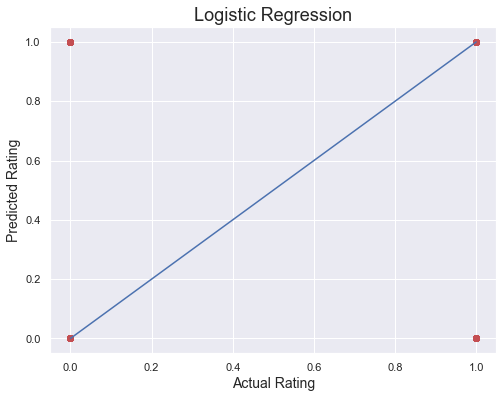

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted Rating',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

# 1. Ridge

In [109]:
from sklearn.linear_model import RidgeClassifier

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = RidgeClassifier()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [77]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

rd = RidgeClassifier(alpha=1, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=8)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 23.6137935145446
Cross Val Score: 88.53560424512152


In [78]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Error:
Mean Absolute Error: 0.07038938810440735
Mean Squared Error: 0.07038938810440735
Root Mean Square Error: 0.2653099849316029


In [79]:
print(accuracy_score(y_test,pred_rd))
print(confusion_matrix(y_test,pred_rd))
print(classification_report(y_test,pred_rd))

0.9296106118955927
[[ 204  276]
 [  53 4141]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55       480
           1       0.94      0.99      0.96      4194

    accuracy                           0.93      4674
   macro avg       0.87      0.71      0.76      4674
weighted avg       0.92      0.93      0.92      4674



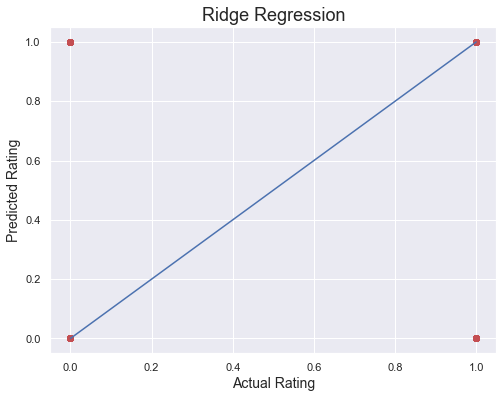

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted Rating',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# DecisionTreeClassifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']}
dt =DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}


In [81]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features = 'auto')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=38)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 2.25351692894612
Cross Val Score: 89.34856904715114


In [82]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:
Mean Absolute Error: 0.09007274283269148
Mean Squared Error: 0.09007274283269148
Root Mean Square Error: 0.3001212135666046


In [83]:
print(accuracy_score(y_test,pred_decision))
print(confusion_matrix(y_test,pred_decision))
print(classification_report(y_test,pred_decision))

0.9099272571673085
[[ 241  239]
 [ 182 4012]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       480
           1       0.94      0.96      0.95      4194

    accuracy                           0.91      4674
   macro avg       0.76      0.73      0.74      4674
weighted avg       0.91      0.91      0.91      4674



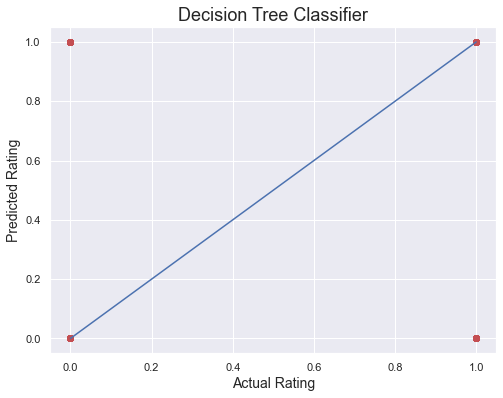

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_decision, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted Rating',fontsize=14)
plt.title('Decision Tree Classifier',fontsize=18)
plt.show()

# Random Forest Classifier

In [85]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_rfc = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_rfc)))

Training accuracy is 0.9861987803573339
Test accuracy is 0.9313222079589217


In [86]:
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(accuracy_score(y_test,y_pred_rfc))

[[ 224  256]
 [  65 4129]]
              precision    recall  f1-score   support

           0       0.78      0.47      0.58       480
           1       0.94      0.98      0.96      4194

    accuracy                           0.93      4674
   macro avg       0.86      0.73      0.77      4674
weighted avg       0.92      0.93      0.92      4674

0.9313222079589217


In [87]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_rfc))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_rfc))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_rfc)))

Error:
Mean Absolute Error: 0.06867779204107831
Mean Squared Error: 0.06867779204107831
Root Mean Square Error: 0.2620644806933559


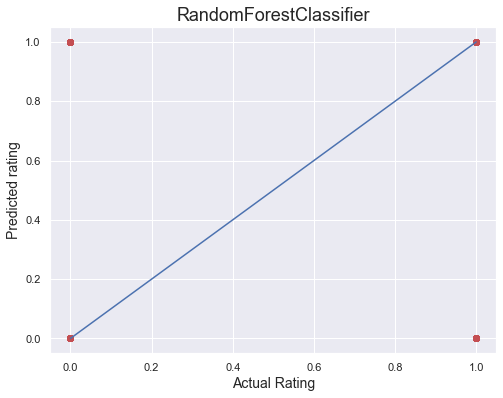

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_rfc, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted rating',fontsize=14)
plt.title('RandomForestClassifier',fontsize=18)
plt.show()

# xgboost

In [89]:
import xgboost
xgb = xgboost.XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_xgb = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_xgb)))

Training accuracy is 0.9485396383866481
Test accuracy is 0.9338896020539152


In [90]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_xgb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

Error:
Mean Absolute Error: 0.06611039794608473
Mean Squared Error: 0.06611039794608473
Root Mean Square Error: 0.25711942350994166


In [91]:
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))

[[ 230  250]
 [  59 4135]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       480
           1       0.94      0.99      0.96      4194

    accuracy                           0.93      4674
   macro avg       0.87      0.73      0.78      4674
weighted avg       0.93      0.93      0.93      4674

0.9338896020539152


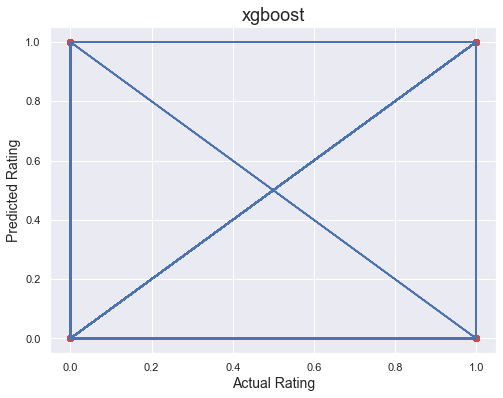

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_xgb, color='r')
plt.plot(y_test,y_pred_xgb, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted Rating',fontsize=14)
plt.title('xgboost',fontsize=18)
plt.show()

# AdaBoostClassifier

In [93]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_ada = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_ada)))

Training accuracy is 0.9311008879854499
Test accuracy is 0.9238339751818571


In [94]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_ada)))

Error:
Mean Absolute Error: 0.07616602481814291
Mean Squared Error: 0.07616602481814291
Root Mean Square Error: 0.27598192842674124


In [95]:
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))
print(accuracy_score(y_test,y_pred_ada))

[[ 210  270]
 [  86 4108]]
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       480
           1       0.94      0.98      0.96      4194

    accuracy                           0.92      4674
   macro avg       0.82      0.71      0.75      4674
weighted avg       0.91      0.92      0.92      4674

0.9238339751818571


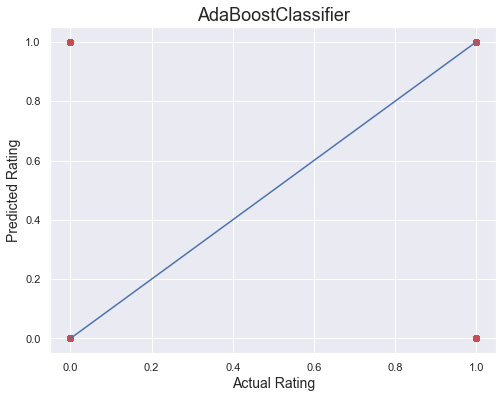

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_ada, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted Rating',fontsize=14)
plt.title('AdaBoostClassifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [105]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_knn = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_knn)))

Training accuracy is 0.9126457686958382
Test accuracy is 0.9107830551989731


In [106]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_knn))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Error:
Mean Absolute Error: 0.08921694480102696
Mean Squared Error: 0.08921694480102696
Root Mean Square Error: 0.2986920568093952


In [107]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[  90  390]
 [  27 4167]]
              precision    recall  f1-score   support

           0       0.77      0.19      0.30       480
           1       0.91      0.99      0.95      4194

    accuracy                           0.91      4674
   macro avg       0.84      0.59      0.63      4674
weighted avg       0.90      0.91      0.89      4674

0.9107830551989731


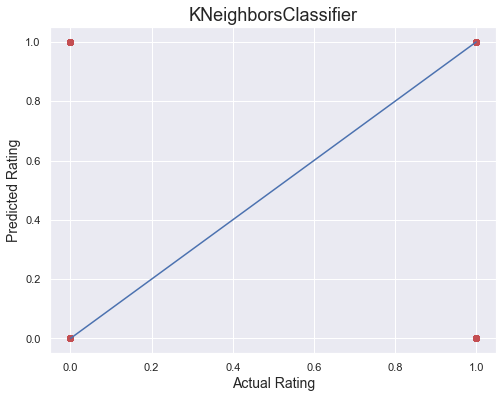

In [128]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_knn, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Rating',fontsize=14)
plt.ylabel('Predicted Rating',fontsize=14)
plt.title('KNeighborsClassifier',fontsize=18)
plt.show()

# Support Vector Classifier

# List of accuracy score of different classification models

In [108]:
print("logistic Regression:-",accuracy_score(y_test,pred_lr))
print("Ridge classifier:-",accuracy_score(y_test,pred_rd))
print("Dicision Tree Classifier:-",accuracy_score(y_test,pred_decision))
print("Random Forest classifier:-",accuracy_score(y_test,y_pred_rfc))
print("xgboost:-",accuracy_score(y_test,y_pred_xgb))
print("AdaBoostClassifier:-",accuracy_score(y_test,y_pred_ada))
print("KNeighborsClassifier:-",accuracy_score(y_test,y_pred_knn))


logistic Regression:- 0.9283269148480958
Ridge classifier:- 0.9296106118955927
Dicision Tree Classifier:- 0.9099272571673085
Random Forest classifier:- 0.9313222079589217
xgboost:- 0.9338896020539152
AdaBoostClassifier:- 0.9238339751818571
KNeighborsClassifier:- 0.9107830551989731


# Plotting Auc-Roc curve..with XGBOOST  prediction..

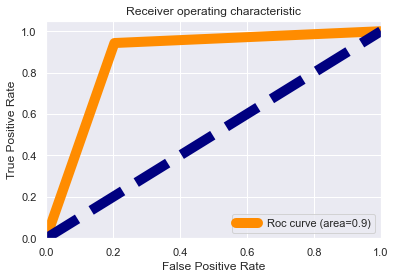

In [140]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(y_pred_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.1f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Model is performing good :

# Conclusion:

In [110]:
import numpy as np
a=np.array(y_test)
a

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [111]:
y_test.shape

(4674,)

In [112]:
predicted=np.array(y_pred_xgb)
predicted

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [113]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
print(df_com)
print(" 1 denotes a goodreview while 0 denotes a badreview")

      original  predicted
0            1          1
1            1          1
2            1          1
3            1          1
4            1          1
...        ...        ...
4669         1          1
4670         1          1
4671         1          1
4672         1          1
4673         0          0

[4674 rows x 2 columns]
 1 denotes a goodreview while 0 denotes a badreview


In [114]:
df_com.sample(10)

,original,predicted
2066,1,1
1241,1,1
400,1,1
1290,1,1
2167,0,0
785,1,1
367,1,0
4276,1,1
1670,1,1
3139,1,1


# Selecting the best model

# The best model is XGBOOST as Accuracy score is best from above tested models.

In [116]:
print("Accuracy Score:-",(accuracy_score(y_test,y_pred_xgb)*100))

Accuracy Score:- 93.38896020539153


# we can safe our model using picle library for deployment purpose

In [ ]:
import pickle
filename = 'RATINGS-PREDICTION-PROJECT'
pickle.dump(xgb, open(filename, 'wb'))

In [8]:
# pip install eli5

     -------------------------------------- 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a8ff7390f17921b44231ca49c83e17c69b755e785ae145e939d6f05f37a04cea
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Note: you may need to restart the kernel to use updated packages.


In [117]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 30)
#random forest
# will give you top 15 features or words  which makes a review worst

Weight,Feature
0.0512 ± 0.0397,bad
0.0426 ± 0.0328,worst
0.0357 ± 0.0245,working
0.0260 ± 0.0256,waste
0.0210 ± 0.0119,good
0.0199 ± 0.0162,poor
0.0151 ± 0.0127,product
0.0133 ± 0.0191,buy
0.0126 ± 0.0180,properly
0.0103 ± 0.0162,month


In [118]:
import eli5
eli5.show_weights(lr,vec = tf_vec, top = 30)
#logistic regression
# will give you top 15 features or words  which makes a review worst or good

Weight?,Feature
+4.787,best
+4.088,awesome
+3.936,nice
+3.690,amazing
+2.994,value
+2.985,great
+2.914,super
+2.844,superb
+2.835,delivery
+2.818,love


In [141]:
test_data =tf_vec.fit_transform(df['Review'])
print(test_data)

  (0, 2079)	0.4334823565550601
  (0, 4167)	0.2716342978434886
  (0, 1994)	0.4362398343099044
  (0, 1618)	0.3197145127206641
  (0, 263)	0.23147174582743407
  (0, 8014)	0.352030586093854
  (0, 5308)	0.34232770607850016
  (0, 5550)	0.3887059699781464
  (1, 4904)	0.18704232882874217
  (1, 4598)	0.28243238186770936
  (1, 4386)	0.18294305026662724
  (1, 9482)	0.3944846635590249
  (1, 2250)	0.19665293471682277
  (1, 9474)	0.31304324185293697
  (1, 9609)	0.16553641856989407
  (1, 9077)	0.3596147043153218
  (1, 858)	0.2448568273306495
  (1, 2432)	0.17593144662778856
  (1, 946)	0.18623432474882817
  (1, 3629)	0.16382929008154118
  (1, 5035)	0.3153503459394098
  (1, 807)	0.15095088687598054
  (1, 1363)	0.13920475024062248
  (1, 607)	0.12837901598828455
  (1, 3744)	0.1593006533513693
  :	:
  (23362, 2103)	0.2673173189930864
  (23362, 9343)	0.25671382780650703
  (23362, 385)	0.4229163360619986
  (23362, 2093)	0.18852741695945777
  (23362, 5593)	0.2610074789078121
  (23362, 6781)	0.10338662298487199

In [143]:
prediction=xgb.predict(test_data)
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#     As we convert our classes into two categories greater or equal to 3 means          good review and denoted as 1 and less then 3 bad review                                      which is denoted as 0.
#     For rating 5,4,3 predicted value is 1
#     For rating 1,2 predicted value is 0

In [190]:
df_com=pd.DataFrame({"Original_Review":df['Review'],"Original_Rating":df['Rating'],"Length":df['Length'],"Clean_Length":df['clean_length'],"tf_vef":test_data,"predicted":prediction}, index= range(len(df['Review'])))
df_com

,Original_Review,Original_Rating,Length,Clean_Length,tf_vef,predicted
0,night mode simply amazing give clear crisp ima...,5,92,59,"(0, 2079)\t0.4334823565550601\n (0, 4167)\t...",1
1,product fantastic great nay awesome camera.bat...,5,210,166,"(0, 4904)\t0.18704232882874217\n (0, 4598)\...",1
2,switched android iphone transition really smoo...,5,503,392,"(0, 7192)\t0.09467788070921886\n (0, 2086)\...",1
3,bought iphone numbr big billion day saved alot...,4,473,332,"(0, 40)\t0.1713360716518642\n (0, 2525)\t0....",1
4,green colour charming pricelessno weight iphon...,5,359,338,"(0, 4067)\t0.11077343736056695\n (0, 4351)\...",1
...,...,...,...,...,...,...
23363,good product happy,5,18,18,"(0, 3866)\t0.8181995752558251\n (0, 3629)\t...",1
23364,good,5,4,4,"(0, 3629)\t1.0",1
23365,good design 👍 valueable product money 🤑💰,5,47,40,"(0, 9388)\t0.815293210662001\n (0, 5335)\t0...",1
23366,sooo good product watch numbr series sooo beau...,5,71,72,"(0, 8191)\t0.7461870714552229\n (0, 7852)\t...",1


In [186]:
df_com.sample(25)

,original,Rating,Length,Clean_Length,tf_vef,predicted
22340,good,3,4,4,"(0, 3629)\t1.0",1
14944,best monitor budget flipkart safety packaging ...,5,73,58,"(0, 5369)\t0.26699040348114866\n (0, 8994)\...",1
9715,"confused first, competition brand panasonic ph...",5,329,210,"(0, 4772)\t0.25827707049879134\n (0, 8604)\...",1
17098,good quality,4,12,12,"(0, 7033)\t0.8194148209077731\n (0, 3629)\t...",1
3206,numbr gb memory card missing......dont buy fli...,1,106,82,"(0, 2530)\t0.31330231437377776\n (0, 1419)\...",0
5457,awsome cemara,5,13,13,"(0, 1473)\t0.8320519857106724\n (0, 655)\t0...",1
2332,excellent product,5,17,17,"(0, 2862)\t0.8662136598071061\n (0, 6781)\t...",1
18736,nice product using numbr day working good till...,4,112,83,"(0, 5650)\t0.503006107345831\n (0, 1826)\t0...",1
9882,gooood,4,6,6,"(0, 3713)\t1.0",1
12394,good product,5,17,12,"(0, 3629)\t0.6720814862647795\n (0, 6781)\t...",1


Conclusion: As our model Accuracy is over 93% which is good in terms of initial model building.Xgboost is best from the rest.